## ElectroDermal Activity/Galvanic Skin Response signal pre-processing and visualization

In [1]:
import pysiology
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


In [2]:
ONSET  = 0
PEAK   = 1
OFFSET = 2
DATA_PATH = '../data/Anxiety detection/psysiological-dataset/VP02/BitalinoGSR.txt'

### Visualzing the GSR signal

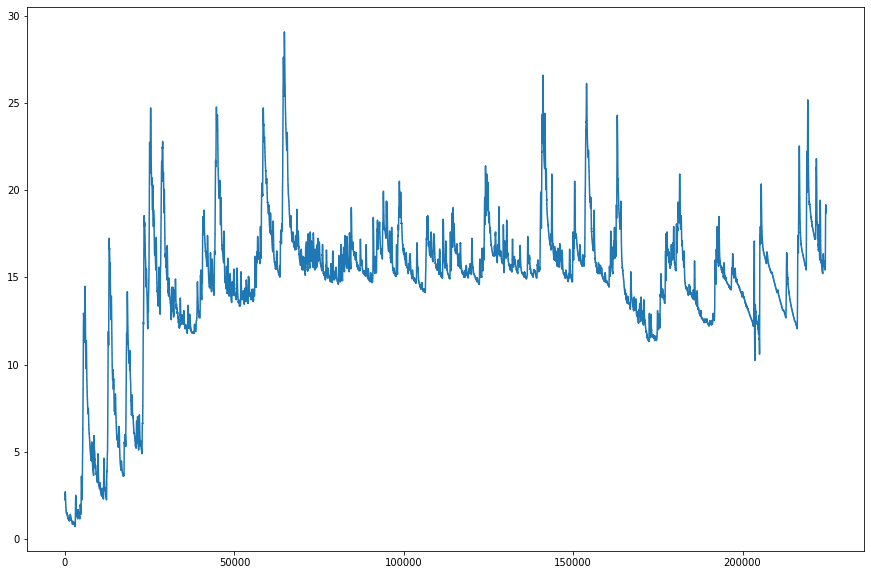

In [129]:

data = pd.read_csv(DATA_PATH, delimiter = '\t', header=None, index_col=False, names = ['val', 'time', 'raw'])
signal = data["val"]
plt.figure(figsize=(15,10))
sns.lineplot(data=signal)

### Applying a second order Butterworth filter 

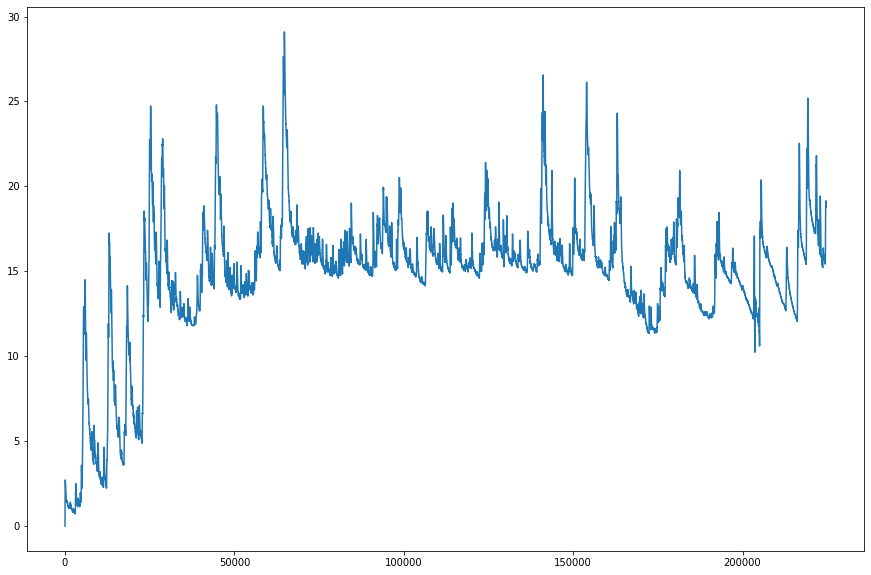

In [69]:

signal_lowfilter = pysiology.electrodermalactivity.butter_lowpass_filter(signal, 10, 100,7)
plt.figure(figsize=(15,10))
sns.lineplot(data=signal_lowfilter)

### Convert Raw GSR signal to Phasic signal

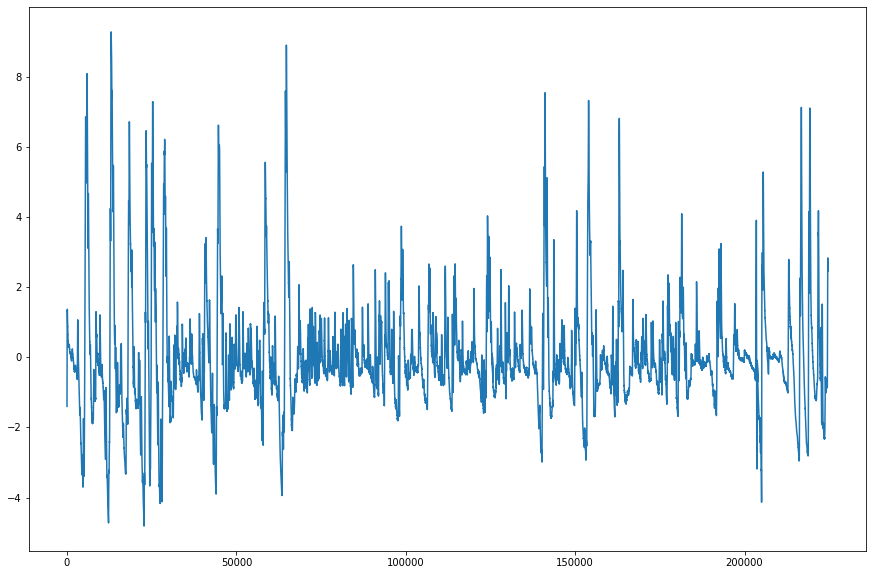

In [101]:
signal_phasic = pysiology.electrodermalactivity.phasicGSRFilter(signal_lowfilter, 100, seconds=20)
signal_phasic_np = np.asarray(signal_phasic)
plt.figure(figsize=(15,10))
sns.lineplot(data=signal_phasic_np)

### Calculating the onset and offset of the peaks
- Output: Multi-dimensional array
- Output Size: [onsetIndex, maxIndex, offsetIndex] x nPeaks

In [102]:
peaks = pysiology.electrodermalactivity.findPeakOnsetAndOffset(signal_phasic, onset=0.03, offset=0.03)
magnitude = []
duration = []

### Calculating the mean peak magnitude and mean time interval of the peaks

In [ ]:
for peak in peaks:
    magnitude.append(signal_phasic_np[peak[PEAK]] - signal_phasic_np[peak[ONSET]])
    duration.append(peak[OFFSET] - peak[ONSET])
magnitude = np.array(magnitude)
duration = np.array(duration)
mdOR = duration.mean()
mmOR = magnitude.mean()
print(f'Mean duration: {mdOR}')
print(f'Mean magnitude: {mmOR}')